In [13]:
# We must first import our relevant packages to this project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# We will use the requests package to call on APIs.
import requests

import time
import datetime

# We will use the citipy package to generate a list of randomly selected cities.
from citipy import citipy

import os

# We will use the getpass function to keep our API key hidden.
import getpass

In [2]:
# We will use the getpass function to define the API key we are using to make requests, while keeping it hidden.
api_key = getpass.getpass()

········


In [3]:
# The cities_to_check variable will be a list containing randomly selected cities using the citipy package.
# Later we will make API requests to OpenWeatherMap and try to extract data related to each city.
# The citipy package may return cities, for which OpenWeatherMap has no data, hence, we are "checking" each city.
# Later we will define a new list containing only those cities, for which OpenWeatherMap does have data.
cities_to_check = []

In [4]:
# We will use the numpy and citipy packages to generate a list of randomly selected cities.
# We will first define two lists: one for latitude, and one for longitude.
# We will then use the zip function with these two lists to form coodinates pairs of latitude and longitude.
latitudes = np.random.uniform(low=-90.000, high=90.000, size=1500)
longitudes = np.random.uniform(low=-180.000, high=180.000, size=1500)
latitudes_and_longitudes = zip(latitudes, longitudes)

# The citipy package will return the city closest to each coordinate pair.
# By using this method of returning cities in a for-loop, we will generate a list of cities.
for latitude_and_longitude in latitudes_and_longitudes:
    city = citipy.nearest_city(latitude_and_longitude[0], latitude_and_longitude[1]).city_name
    
    # We do not want to add the same city to our list more than once,
    # so we only append a city to our list if it is not already in the list.
    if city not in cities_to_check:
        cities_to_check.append(city)

# Here we print the len of the cities_to_check variable to confirm that we have a sufficient amount of cities.
len(cities_to_check)

623

In [5]:
# Using the requests package, we will be making calls to the OpenWeatherMap API.
# First we define the general URL variable,
# then we will be able to use this base URL, while defining other elements,
# such as which units to return numerical data in, and which city to check.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# This defines the more specific URL.
# It uses the general URL we defined earlier, and inserts our API key, the units we want our results in, and later in a for loop we will concatenate the specific city to the end of the URL.
query_url = f"{url}appid={api_key}&units={units}&q="

In [6]:
# We are only allowed to make a limited amount of requests per a certain time restraint.
# Here we make a subset of our cities_to_check list containing only the first 50 cities.
# We will use this subset-list for testing purposes, and only use our full list once we are confident our code will work.
cities_to_check_subset_for_testing = cities_to_check[:50]

In [7]:
# latitudes = []
# temperatures = []
# found_cities = []

# print("Beginning Data Retrieval")

# for city in cities_to_check:
#     response = requests.get(query_url + city).json()
#     city_name = cities_to_check[cities_to_check.index(city)]
#     record_number = cities_to_check.index(city)
    
#     try:
#         print(f"Processing Record {record_number} of Set | {city_name}")
#         found_cities.append(city_name)
#         latitudes.append(response["coord"]["lat"])
#         temperatures.append(response["main"]["temp"])
        
#     except:
#         print ("City not found.  Skipping...")
        
# print("-----------------------------")
# print("Data Retrieval Complete")
# print("-----------------------------")



# This block of code serves the same purpose as the block of code above.
# The only difference is that we are using a subset of the entire list of cities for testing purposes.

# We will soon use the pandas package to create a dataframe containing information about each city in our list.
# Here initialize a list for everything related to the city we are interested in.
# When we are ready to make our dataframe, we will first define a dictionary containing each of these lists.
# The list of cities we generated earlier will most likely contain cities for which the OpenWeatherMap API has no data.
# Therefore these lists should be of shorter length than our full list of cities.
# We can only create a dataframe from a list of dictionaries if each list is the same length.
# Therefore, we define the city_names list to hold cities only for which data was found.
city_names = []
city_cloudinesses = []
city_countries = []
city_timestamps = []
city_humidities = []
city_latitudes = []
city_longitudes = []
city_max_temperatures = []
city_wind_speeds = []

print("Beginning Data Retrieval")

# In this for-loop, we begin by using the requests package to return a json file containing the data we are interested in for each city.
# Earlier, we checked the length of our cities_to_check list to confirm it is a sufficient amount.
# We will also determine the index for each city, so the user can see how many cities have been checked in real time.
for city in cities_to_check_subset_for_testing:
    response = requests.get(query_url + city).json()
    record_number = cities_to_check_subset_for_testing.index(city)
    
    # As stated before, the OpenWeatherMap API may not have data for every city in our list.
    # We must therefore use a try block and an except block.
    # This will ensure our program does not crash if the for-loop reaches a city for which the OpenWeatherMap API has no data.
    try:
        # By extracting the city name from the json file, the user can see which city the for-loop is currently testing, not only by index number, but by name.
        city_name = response["name"]
        print(f"Processing Record {record_number} of Set | {city_name}")
        city_names.append(response["name"])
        city_cloudinesses.append(response["clouds"]["all"])
        city_countries.append(response["sys"]["country"])
        city_timestamps.append(response["dt"])
        city_humidities.append(response["main"]["humidity"])
        city_latitudes.append(response["coord"]["lat"])
        city_longitudes.append(response["coord"]["lon"])
        city_max_temperatures.append(response["main"]["temp_max"])
        city_wind_speeds.append(response["wind"]["speed"])
        
    except:
        print ("City not found.  Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
Processing Record 0 of Set | Atuona
Processing Record 1 of Set | Hermanus
Processing Record 2 of Set | Bambous Virieux
Processing Record 3 of Set | Kapaa
Processing Record 4 of Set | Logan
Processing Record 5 of Set | Mataura
Processing Record 6 of Set | Ushuaia
Processing Record 7 of Set | Manicore
Processing Record 8 of Set | Los Llanos de Aridane
Processing Record 9 of Set | Manjacaze
Processing Record 10 of Set | Busselton
Processing Record 11 of Set | Praia da Vitoria
Processing Record 12 of Set | Jutai
Processing Record 13 of Set | Mar del Plata
City not found.  Skipping...
Processing Record 15 of Set | Abha
Processing Record 16 of Set | Morrope
City not found.  Skipping...
Processing Record 18 of Set | Lanzhou
Processing Record 19 of Set | Namatanai
Processing Record 20 of Set | Rikitea
Processing Record 21 of Set | Bloemhof
Processing Record 22 of Set | Vaini
Processing Record 23 of Set | Esperance
Processing Record 24 of Set | Provideniya
Processing Re

In [8]:
# We will soon create a dataframe using the data we extracted earlier from the OpenWeatherMap API.
# Here we define a dictionary of the lists we defined in the for-loop that made calls to the API.
# We will use this dictionary for the data in our dataframe.
weather_data_dictionary = {
    "City": city_names,
    "Cloudiness": city_cloudinesses,
    "Country": city_countries,
    "UNIX Timestamp": city_timestamps,
    "Humidity": city_humidities,
    "Latitude": city_latitudes,
    "Longitude": city_longitudes,
    "Max Temperature": city_max_temperatures,
    "Wind Speed": city_wind_speeds
}

In [9]:
# # Here we create a dataframe using the dictionary of lists we defined earlier.
weather_data = pd.DataFrame(weather_data_dictionary)
weather_data.head()

,City,Cloudiness,Country,UNIX Timestamp,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Atuona,56,PF,1539286405,100,-9.80,-139.03,80.38,17.58
1,Hermanus,92,ZA,1539286405,89,-34.42,19.24,54.73,4.05
2,Bambous Virieux,20,MU,1539284400,60,-20.34,57.76,73.40,17.22
3,Kapaa,40,US,1539284160,69,22.08,-159.32,82.04,10.29
4,Logan,75,US,1539284160,58,41.73,-111.83,51.08,2.59


##### In the following few cells I try creating a new column of dates from the UNIX time stamp column with the format YYYY-MM-DD.  These lines did not have the desired results, but I will keep them commented out for now, rather than deleting them, so that I may return later and try these ways again.

In [ ]:
# datetime.datetime.fromtimestamp(1539040243)
# time.strftime("%Y-%m-%d")

In [ ]:
# dates = []
# for timestamp in weather_data["UNIX Timestamp"]:
#     dates.append(datetime.datetime.fromtimestamp(timestamp))
#     time.strftime("%Y-%m-%d")

In [ ]:
# weather_data["Date"] = dates
# weather_data.head()

In [ ]:
# # The API call returned the time as a UNIX timestamp, so here we add a column to our dataframe showing a more readable human time.
# # We create this column us the to_datetime function of the pandas package.
# weather_data["Date"] = pd.to_datetime(weather_data["UNIX Timestamp"], unit="s")
# # weather_data["Date"] = pd.to_datetime(weather_data["UNIX Timestamp"].astype(str))
# # weather_data["Date"] = weather_data.astype(str)
# weather_data.head()

In [10]:
# Our API call returned the date as a UNIX timestamp.
# Here we use the pandas to_datetime function to convert this to a more readable human date.
# Instead of overwriting the UNIX timestamp, we will store the converted dates in a new column.
weather_data["Date"] = pd.to_datetime(weather_data["UNIX Timestamp"], unit="s")
weather_data.head()

,City,Cloudiness,Country,UNIX Timestamp,Humidity,Latitude,Longitude,Max Temperature,Wind Speed,Date
0,Atuona,56,PF,1539286405,100,-9.80,-139.03,80.38,17.58,2018-10-11 19:33:25
1,Hermanus,92,ZA,1539286405,89,-34.42,19.24,54.73,4.05,2018-10-11 19:33:25
2,Bambous Virieux,20,MU,1539284400,60,-20.34,57.76,73.40,17.22,2018-10-11 19:00:00
3,Kapaa,40,US,1539284160,69,22.08,-159.32,82.04,10.29,2018-10-11 18:56:00
4,Logan,75,US,1539284160,58,41.73,-111.83,51.08,2.59,2018-10-11 18:56:00


In [11]:
# When we convert the UNIX timestamp to a more readable human date, it includes hours, minutes, and seconds.
# Here we will define the list variable dates, which will contain the date for each weather-data record.
# We will then use a for-loop, in which we will cast the date as a string, and set the date to only the first 10 characters thereof.
# Our date is in the format "YYYY-MM-DD HH:MM:SS".
# The First "Y" to the last "D", including the dashes, make up 10 characters.
# Finally, we will set the date column equal to this new list of formatted dates.
dates = []

for date in weather_data["Date"]:
    date = str(date)[:10]
    dates.append(date)

weather_data["Date"] = dates

weather_data.head()

,City,Cloudiness,Country,UNIX Timestamp,Humidity,Latitude,Longitude,Max Temperature,Wind Speed,Date
0,Atuona,56,PF,1539286405,100,-9.80,-139.03,80.38,17.58,2018-10-11
1,Hermanus,92,ZA,1539286405,89,-34.42,19.24,54.73,4.05,2018-10-11
2,Bambous Virieux,20,MU,1539284400,60,-20.34,57.76,73.40,17.22,2018-10-11
3,Kapaa,40,US,1539284160,69,22.08,-159.32,82.04,10.29,2018-10-11
4,Logan,75,US,1539284160,58,41.73,-111.83,51.08,2.59,2018-10-11


In [12]:
# Here we reorder the columns
weather_data = weather_data[["City", "Country", "Date", "Max Temperature", "Humidity", "Wind Speed", "Cloudiness", "Latitude", "Longitude", "UNIX Timestamp"]]
weather_data.head()

,City,Country,Date,Max Temperature,Humidity,Wind Speed,Cloudiness,Latitude,Longitude,UNIX Timestamp
0,Atuona,PF,2018-10-11,80.38,100,17.58,56,-9.80,-139.03,1539286405
1,Hermanus,ZA,2018-10-11,54.73,89,4.05,92,-34.42,19.24,1539286405
2,Bambous Virieux,MU,2018-10-11,73.40,60,17.22,20,-20.34,57.76,1539284400
3,Kapaa,US,2018-10-11,82.04,69,10.29,40,22.08,-159.32,1539284160
4,Logan,US,2018-10-11,51.08,58,2.59,75,41.73,-111.83,1539284160


In [42]:
# After forming a dataframe using the weather data we extracted from the OpenWeatherMap API, we will make a csv file therefrom.
# We first check to see if an output directory already exists.
# We assume the user will either use capitalization, lowercase, or uppercase, for the name of this output directory.
# If so, we simply export the csv file thereto.
# If there is no output directory, we use the mkdir function from the os package to create the directory; then we export the csv file thereto.

if os.path.exists("Output") == True | os.path.exists("output") == True | os.path.exists("OUTPUT" == True):
    weather_data_csv = weather_data.to_csv("Output/weather_data.csv", encoding="utf-8", index=False, header=True)
    
else:
    os.mkdir("Output")
    weather_data.to_csv("Output/weather_data.csv", encoding="utf-8", index=False, header=True)

## In this section, we create various graphs showing the relationship between latitude, and a weather-related variable.

In [32]:
# We will display the date on each graph using a f-string.
# Every value in the the Date column of our weather_data dataframe has the same value, as each value came from an API call made at the same time in a for-loop.
# Therefore we simply use the value of the first row for our current_date variable.
# current_date = weather_data["Date"][0]

if weather_data["Date"].nunique() == 1:
    current_date = weather_data["Date"][0]
else:
    print("There is more than one date in the date column.\nTry clearing all cells and running the API-call for-loop again.")

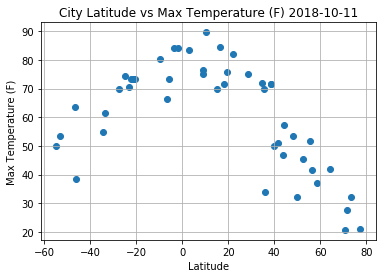

In [33]:
# Here we create a scatter plot showing the relationship between latitude, and the maximum temperature for the day.
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"])
plt.title(f"City Latitude vs Max Temperature (F) {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

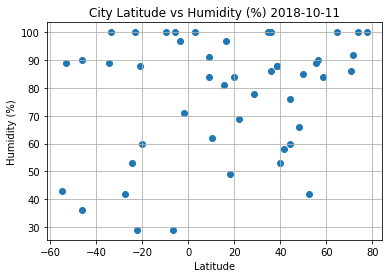

In [34]:
# Here we create a graph showing the relationship between latitude, and the humidity for the day.
plt.scatter(weather_data["Latitude"], weather_data["Humidity"])
plt.title(f"City Latitude vs Humidity (%) {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

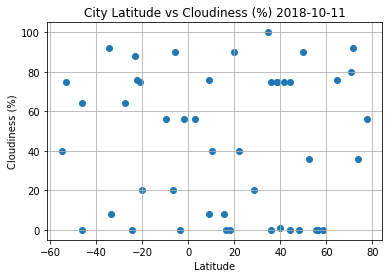

In [35]:
# Here we create a graph showing the relationship between latitude and cloudiness for the day.
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"])
plt.title(f"City Latitude vs Cloudiness (%) {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

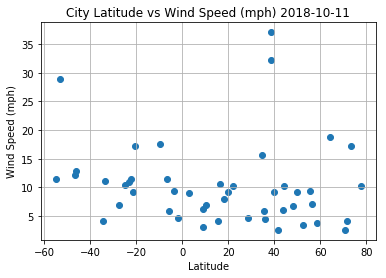

In [36]:
# Here we create a graph showing the relationship between latitude and wind speed for the day.
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"])
plt.title(f"City Latitude vs Wind Speed (mph) {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()